In [0]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Churn_Modelling.csv')

In [5]:
# df = pd.read_csv('Churn_Modelling.csv',header='infer')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
# Minmax for normalization
def minmax(col):
    return (col - np.min(col))/(np.max(col) - np.min(col))

In [0]:
# Converting Categorical columns to one hot encoded values
categorical = ['Geography', 'Gender']
for x in categorical:
    df[x] = pd.Categorical(df[x])

temp = df[categorical]
df = df.drop(categorical, axis=1)
cat_df = pd.concat([df, pd.get_dummies(temp)], axis=1)

In [8]:
cat_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [0]:
y = cat_df['Exited']
X = cat_df.drop(['Exited','RowNumber','CustomerId','Surname'], axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [0]:
#Normalization on numeric columns
X['Balance'] = minmax(X['Balance'])
X['EstimatedSalary'] = minmax(X['EstimatedSalary'])
X['CreditScore'] = minmax(X['CreditScore'])
X['Age'] = minmax(X['Age'])
X['Tenure'] = minmax(X['Tenure'])

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,1,1,0


In [13]:
X.shape

(10000, 13)

In [14]:
y.shape

(10000,)

### Feature Selection using Univariate Selection

In [15]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) 

                Specs       Score
9   Geography_Germany  225.464426
6      IsActiveMember  118.199414
11      Gender_Female   61.909174
1                 Age   57.832080
8    Geography_France   54.923705
12        Gender_Male   51.539926
3             Balance   28.502819
10    Geography_Spain   20.867206
4       NumOfProducts    5.055394
0         CreditScore    0.456316


### Feature Importance Selection using ExtraTree Classifier

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.13801961 0.23748667 0.10773463 0.13820029 0.13585374 0.02275195
 0.03641595 0.13298005 0.00720378 0.02556896 0.00423695 0.00642895
 0.00711847]


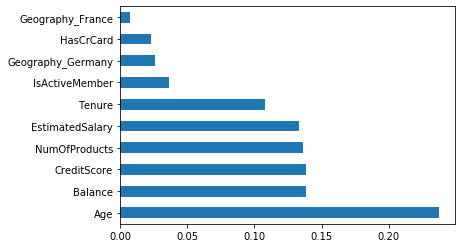

In [16]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [17]:
cols = ['Geography_Germany','IsActiveMember','Gender_Female','Age','Geography_France','Gender_Male','Balance','Geography_Spain','NumOfProducts','CreditScore']
X_features = X[cols]
X_features.head()

,Geography_Germany,IsActiveMember,Gender_Female,Age,Geography_France,Gender_Male,Balance,Geography_Spain,NumOfProducts,CreditScore
0,0,1,1,0.324324,1,0,0.000000,0,1,0.538
1,0,1,1,0.310811,0,0,0.334031,1,1,0.516
2,0,0,1,0.324324,1,0,0.636357,0,3,0.304
3,0,0,1,0.283784,1,0,0.000000,0,2,0.698
4,0,1,1,0.337838,0,0,0.500246,1,1,1.000


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Splitting Data into train and test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=123)

In [20]:
X_train.shape

(8000, 10)

In [21]:
y_train.shape

(8000,)

### Naive Bayes

In [22]:
clf_NB = GaussianNB()
clf_NB.fit(X_train,y_train)
NB_pred = clf_NB.predict(X_test)
print(NB_pred)

[0 0 0 ... 0 0 0]


In [23]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, NB_pred)))

Accuracy on test data is 0.81


### Decision Tree

In [0]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth = 3, random_state = 0)
clf = clf.fit(X_train, y_train)

In [0]:
y_pred = clf.predict(X_test)

In [26]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.837


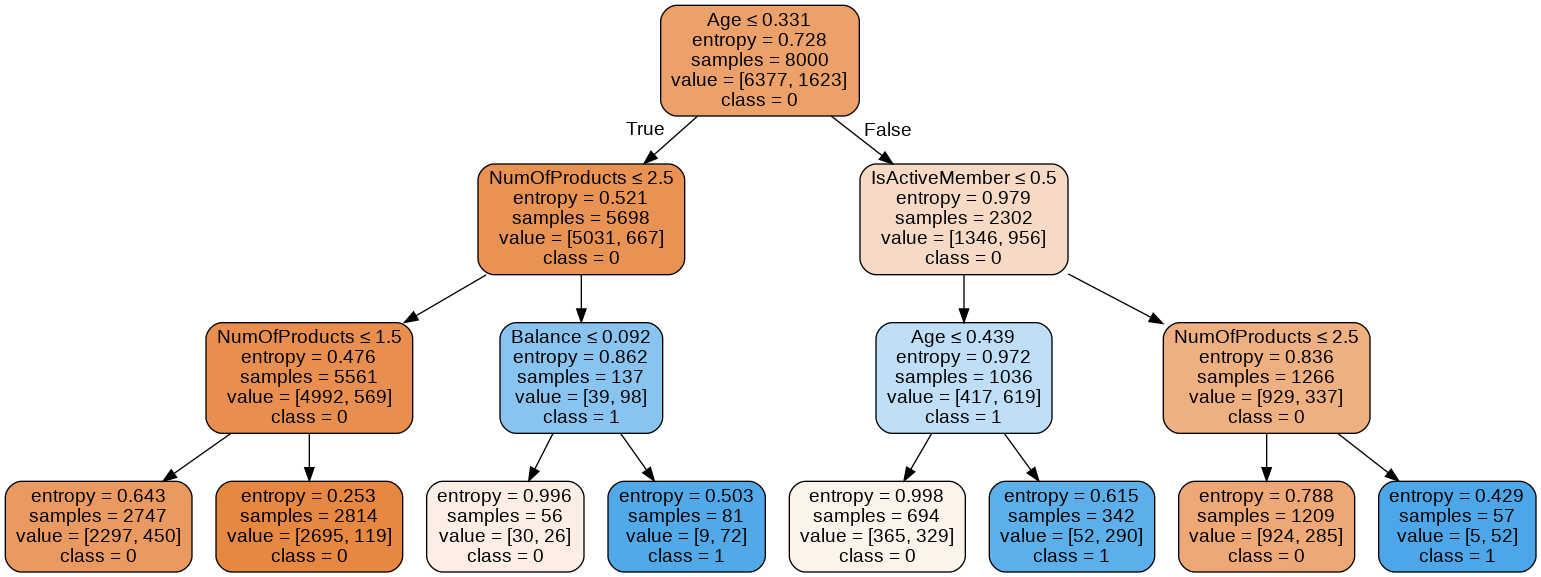

In [27]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('admit.png')
Image(graph.create_png())

### KNN

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Accuracy')

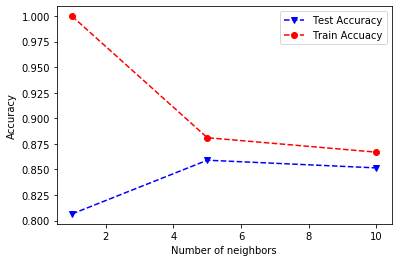

In [28]:
numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    knn_pred = clf.predict(X_test)
    knn_pred_train = clf.predict(X_train)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(y_train,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

### SVM

In [29]:
svm_model = SVC(gamma='auto')
svm_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svm_pred = clf.predict(X_test)

In [31]:
print("Accuracy:",accuracy_score(y_test, svm_pred))

Accuracy: 0.8515


### Logit

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Text(0, 0.5, 'Accuracy')

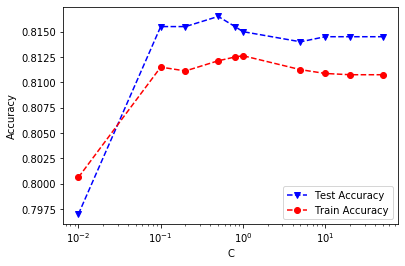

In [32]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X_train,y_train)
    log_reg_pred = clf.predict(X_test)
    log_reg_pred_train = clf.predict(X_train)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(y_train,log_reg_pred_train))
    
    

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  